<a href="https://colab.research.google.com/github/Purushotham011/Neural-Networks-and-DL/blob/main/Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Step 2 :Load and Preprocess the Data

load the MNIST dataset and preprocess it :

In [ ]:
#Load the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalise the images to a range of [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Reshape the images to have a single channel (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Convert labels to One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Step 3: Build the Neural Network Model

Create a simple convolutionsal neural network (CNN) :

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Step 4: Compile the Model



In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Step 5: Train the Model

Fit the model to the

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9989 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0017
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9999 - loss: 4.8794e-04 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 1.0000 - loss: 2.4214e-04 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 1.0000 - loss: 8.8852e-05 - val_accuracy: 0.9992 - val_loss: 0.0021
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9954 - val_loss: 0.0139


#Step 6: Evaluate the Model

Evaluate the model's performence on the test set :

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9833 - loss: 0.0821
Test accuracy: 0.987500


#Step 7: Visualize the Results

plot the training and validation accuracy and loss

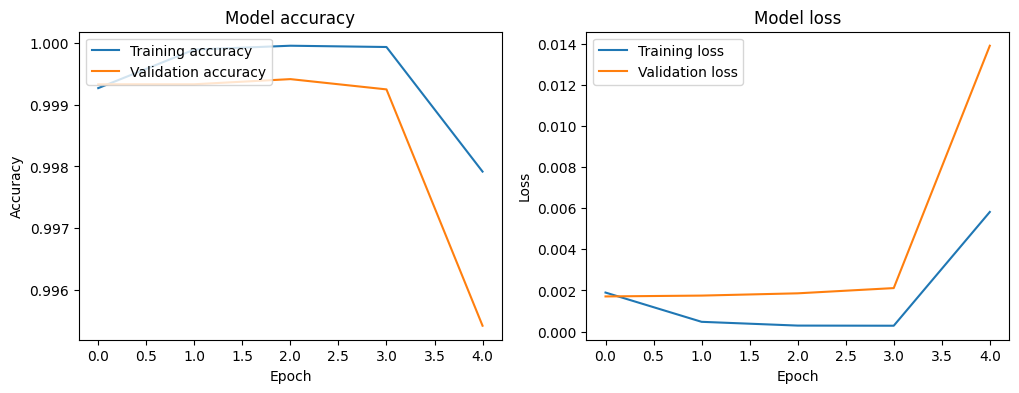

In [ ]:
#Plot training & validation accuracy values
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

#Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

#Step 8: Make Predictions

(Optional) You can make predictions and visualise some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


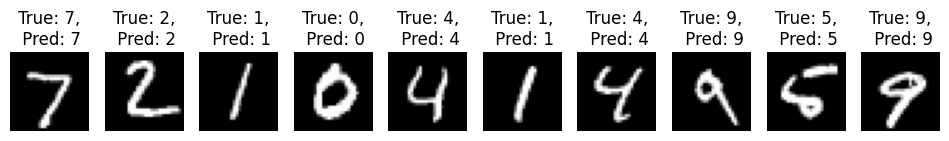

In [ ]:
predictions = model.predict(x_test)

# Visualize same predictions
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()},\n Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()